<h1><center>Exercise Sheet 5 Ulzii-Utas.N</center></h1>

# Exercise 1.1
Simulation of multi compartment HH model

${V\prime}=\frac{V}{mV}$

${V\prime}_j(t + \delta{t})=\frac{\delta{t}}{C_m} * (I_e(t) - g_L * ({V\prime}_j(t) - E_L) - g_{Na,j} * ({V\prime}_j(t) - E_{Na}) - g_{K,j} * ({V\prime}_j(t) - E_K) - g_{ax} * ({V\prime}_j(t) - {V\prime}_{j-1}(t)) - g_{ax} * ({V\prime}_j(t) - {V\prime}_{j+1}(t)) + V_j(t)$

$g_{Na,j} = \bar{g}_{Na}m_j^3h_j^3$

$g_{K,j} = \bar{g}_{K}n_j^4$

$m(t + \delta{t})=\delta{t} * (\alpha_m * (1 - m(t)) - \beta_m * m(t)) + m(t)$

$h(t + \delta{t})=\delta{t} * (\alpha_h * (1 - h(t)) - \beta_h * h(t)) + h(t)$

$n(t + \delta{t})=\delta{t} * (\alpha_n * (1 - n(t)) - \beta_n * n(t)) + n(t)$

# Exercise 1.2

In [126]:
import numpy as np
import mpmath as mpmath
import math as math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

Cm = 1
Ena = 115
Ek = -12
El = 10.6
V0 = 0
gNa = 120
gK = 36
gL = 0.3
gAx = 0.5
N = 100
deltaT = 0.025
te = 60
ts = 260
je = 14 - 1
I0 = [6, 8, 15, 20]

In [127]:
def alpha_m(V):
    if V == 25:
        return 1
    else:
        return 0.1 * ((V - 25)/(1 - math.exp(-(V-25)/10)))
def beta_m(V):
    return 4 * math.exp(-V/18)

In [128]:
def alpha_h(V):
    return 0.07 * math.exp(-V/20)
def beta_h(V):
    return 1/(1 + math.exp(-(V - 30)/10))

In [129]:
def alpha_n(V):
    if V == 10:
        return 0.1
    else:
        return 0.01 * ((V - 10)/(1 - math.exp(-(V-10)/10)))
def beta_n(V):
    return 0.125 * math.exp(-V/80)

In [130]:
def ie_t(t, j, te, ts, I0):
    if t < te or ts <= t or j != je:
        return 0
    if te <= t and t < ts and j == je:
        return I0

0.05292657528609837 0.5973113762398123 0.31734235189148685


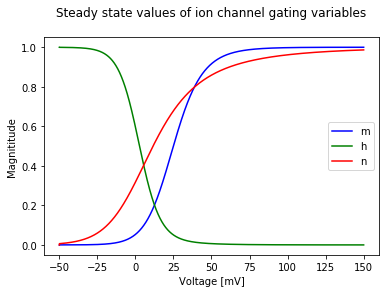

In [131]:
V_init = -50
V_fini = 150
V_step = 0.0001
V_step_for_50 = int(50/V_step)
V_steady_state = []
m_0 = 0
n_0 = 0
h_0 = 0

m = np.zeros(int(200/V_step))
h = np.zeros(int(200/V_step))
n = np.zeros(int(200/V_step))

for i in range((int(200/V_step))):
    if i == 0:
        V_steady_state.append(-50)
        m[i] = 0
        n[i] = 0
        h[i] = 1
    else:
        add =  float("%0.7f" % (V_steady_state[i-1] + V_step))
        V_steady_state.append(add)
        m[i] = (alpha_m(V_steady_state[i-1]) * (1 - m[i-1]) - beta_m(V_steady_state[i-1]) * m[i-1]) * deltaT + m[i-1]
        h[i] = (alpha_h(V_steady_state[i-1]) * (1 - h[i-1]) - beta_h(V_steady_state[i-1]) * h[i-1]) * deltaT + h[i-1]
        n[i] = (alpha_n(V_steady_state[i-1]) * (1 - n[i-1]) - beta_n(V_steady_state[i-1]) * n[i-1]) * deltaT + n[i-1] 
        
        if V_steady_state[i] == 0:
            m_0 = m[i]
            h_0 = h[i]
            n_0 = n[i]
            
print(m_0, h_0, n_0)

plt.plot(V_steady_state, m, label='m', color = 'blue')
plt.plot(V_steady_state, h, label='h', color = 'green')
plt.plot(V_steady_state, n, label='n', color = 'red')

plt.title(r"Steady state values of ion channel gating variables""\n")
plt.xlabel(r'Voltage [mV]')
plt.ylabel(r'Magnititude')
plt.legend()
plt.show()

In [132]:
def hh_vt(I0, max_range, deltaT, m_0, h_0, n_0):
    V = np.zeros([max_range, N])
    m = np.zeros([max_range, N])
    h = np.zeros([max_range, N])
    n = np.zeros([max_range, N])
    t_arr = []
    j_arr = np.arange(0, N, 1)
    for i in range(max_range):
        mult =  float("%0.7f" % (i * deltaT))
        t_arr.append(mult)
        
        if i == 0:
            for j in range(N):
                V[i][j] = 0
                m[i][j] = m_0
                h[i][j] = h_0
                n[i][j] = n_0
        else:
            for j in range(N-1, -1, -1):
                if j == N-1:
                    V[i][j] = 0
                elif j == 0:
                    V[i][j] = V[i][j+1]
                else:      
                    V[i][j] = ((ie_t(t_arr[i-1], j, te, ts, I0)
                     - gL * (V[i-1][j] - El) 
                     - gNa * m[i-1][j]**(3) * h[i-1][j] * (V[i-1][j] - Ena)
                     - gK * n[i-1][j]**(4) * (V[i-1][j] - Ek)
                     - gAx * (2 * V[i-1][j] - V[i-1][j-1] - V[i-1][j+1])) * (deltaT/Cm) + V[i-1][j])
            
    
                m[i][j] = (alpha_m(V[i-1][j]) * (1 - m[i-1][j]) - beta_m(V[i-1][j]) * m[i-1][j]) * deltaT + m[i-1][j]
                h[i][j] = (alpha_h(V[i-1][j]) * (1 - h[i-1][j]) - beta_h(V[i-1][j]) * h[i-1][j]) * deltaT + h[i-1][j]
                n[i][j] = (alpha_n(V[i-1][j]) * (1 - n[i-1][j]) - beta_n(V[i-1][j]) * n[i-1][j]) * deltaT + n[i-1][j]

    
    t_j_2d = np.zeros([max_range, N])
    for i in range(max_range):    
        for k in range(N):
            t_j_2d[i][k] = t_arr[i]
            
    j_t_2d = np.zeros([max_range, N])
    for i in range(max_range):
        j_t_2d[i] = j_arr
        
    return V, t_j_2d, j_t_2d, t_arr

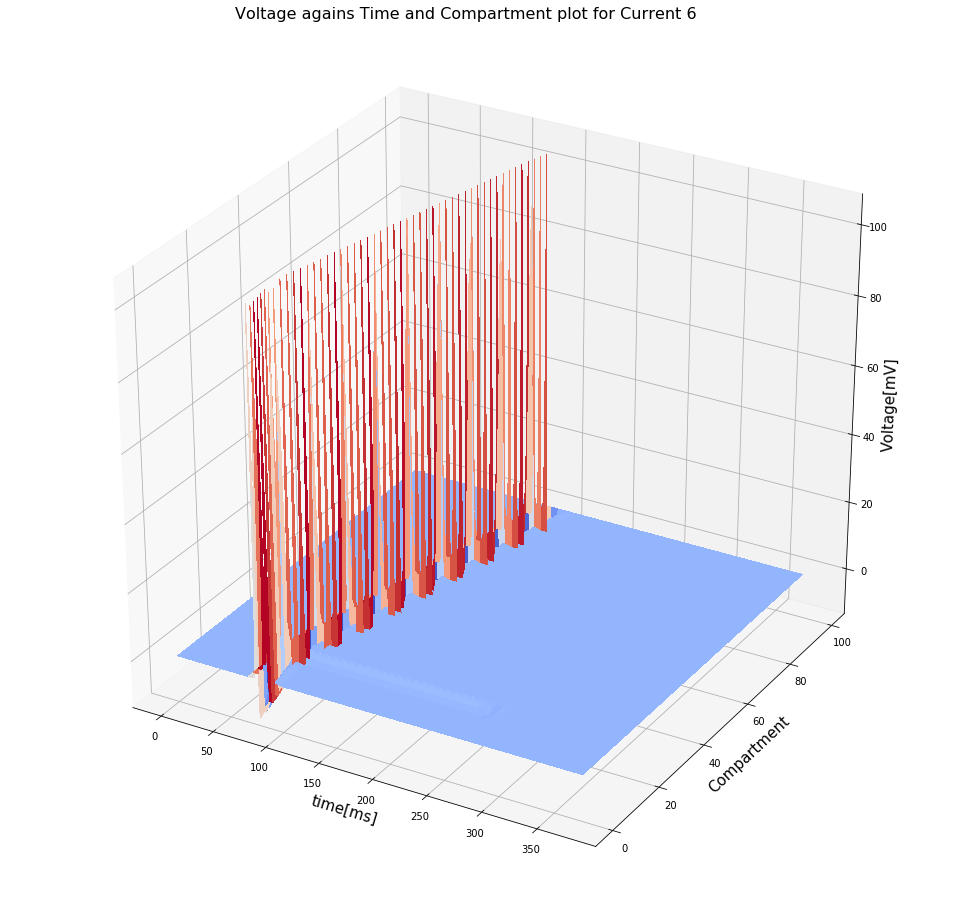

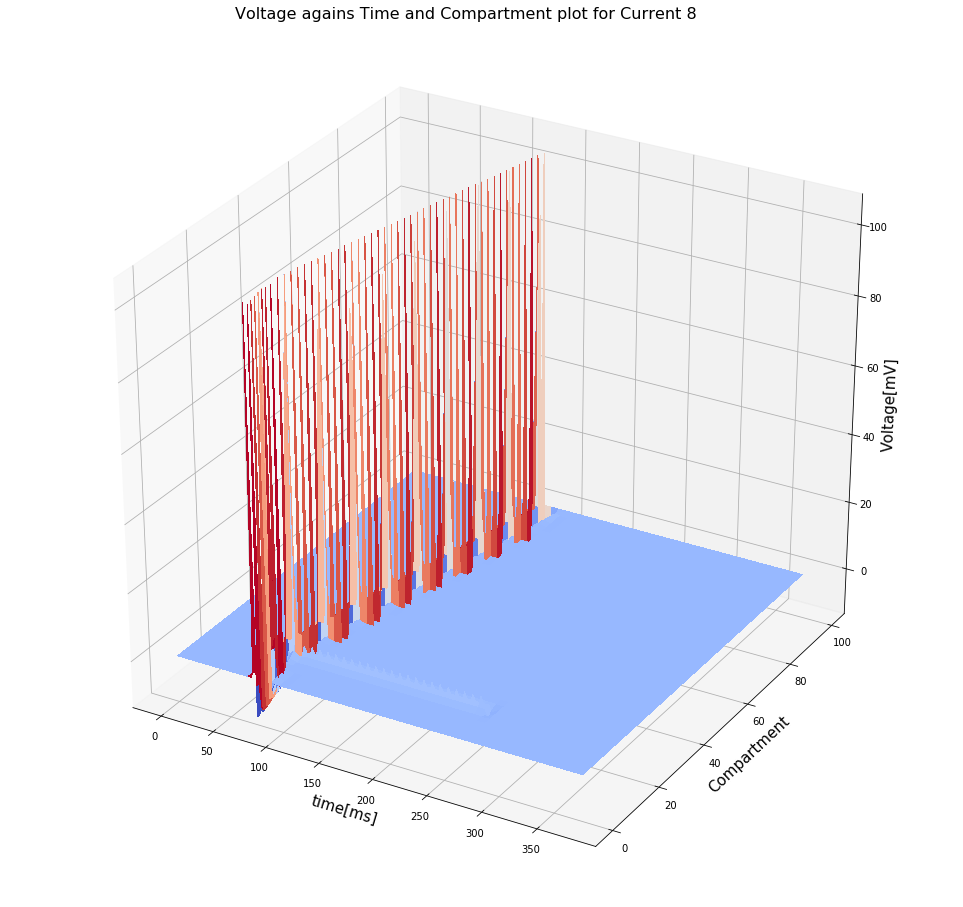

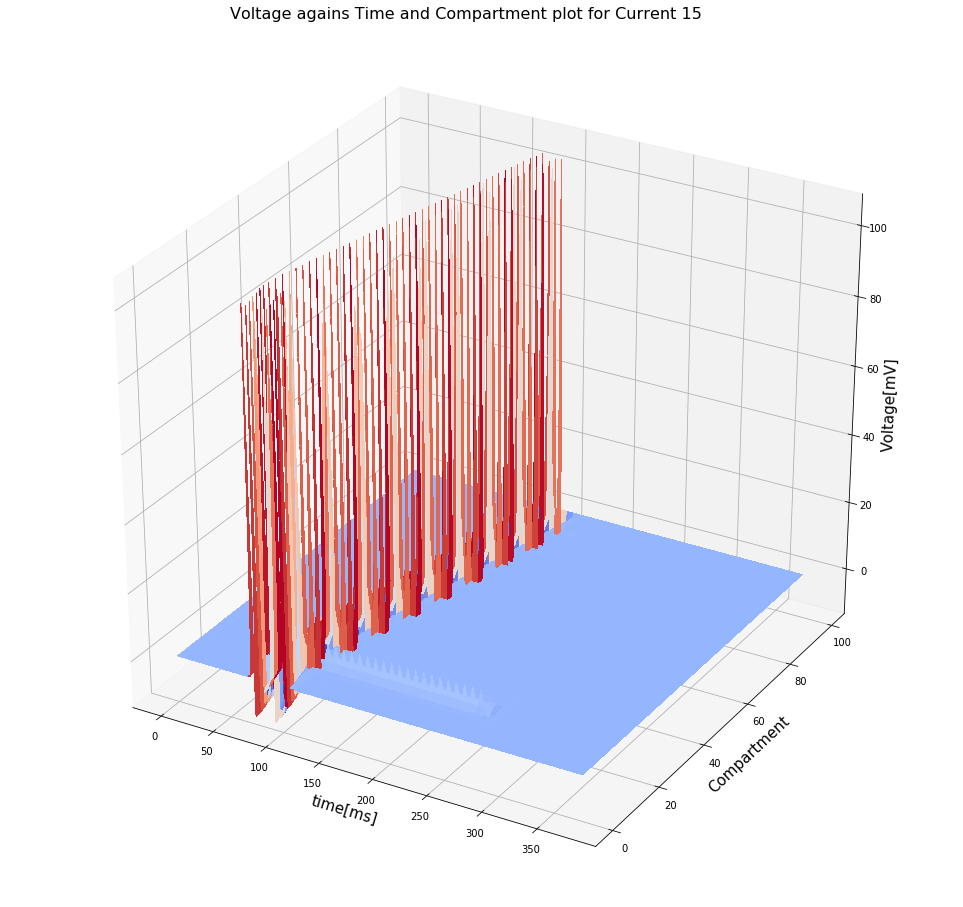

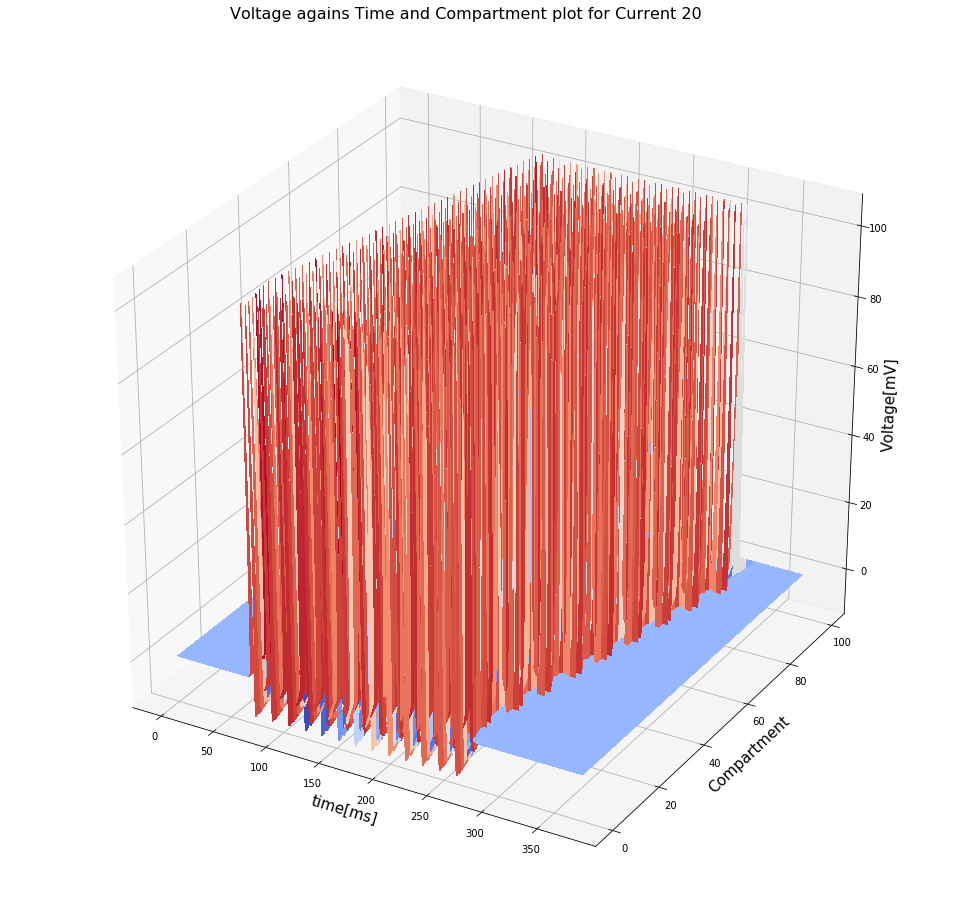

In [133]:
max_range = 15000

for i in range(4):    
    V, t, j, t_only = hh_vt(I0[i], max_range, deltaT, m_0, h_0, n_0)

    fig = plt.figure(figsize=(17,16))
    ax = fig.gca(projection='3d')
    fig.suptitle("Voltage agains Time and Compartment plot for Current {}".format(I0[i]), fontsize=16, y=0.90)
    ax.set_xlabel('time[ms]', fontsize=15)
    ax.set_ylabel('Compartment', fontsize=15)
    ax.set_zlabel('Voltage[mV]', fontsize=15)
    surf = ax.plot_surface(t, j, V, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()


As, shown in the plots, the pulse starts after the current is injected. The compartments without current injection has a delayed pulse. Also, when the current trespasses a certain threshold we can see the continuous pluses. 

# Exercise 2
HH model extension: A-Type current, single compartment
model

# Exercise 2.1

In [104]:
Cm = 1
Ena = 50
Ek = -77
Ea = -80
El = -22
V0 = -73
gNa = 120
gK = 20
gA = 47.7
gL = 0.3

deltaT = 0.025
te = 60
ts = 460

I0_start = 5
I0_end = 20
I0_delta = 0.5
I0_steps = (I0_end - I0_start) / I0_delta

In [52]:
def alpha_m_2(V):
    if V == -34.7:
        return 3.8
    else:
        return 3.8 * (0.1 * (V + 34.7)/(1 - math.exp(-(V + 34.7)/10)))
def beta_m_2(V):
    return 3.8 * 4 * math.exp(-(V + 59.7)/18)

In [53]:
def alpha_h_2(V):
    return 3.8 * 0.07 * math.exp(-(V + 53)/20)
def beta_h_2(V):
    return 3.8/(1 + math.exp(-(V + 23)/10))

In [54]:
def alpha_n_2(V):
    if V == -50.7:
        return 1.9 * 0.1 
    else:
        return 1.9 * 0.01 * ((V + 50.7)/(1 - math.exp(-(V + 50.7)/10)))
def beta_n_2(V):
    return 1.9 * 0.125 * math.exp(-(V + 60.7)/80)

In [75]:
def a_infiniti(V):
    return ((0.0761 * math.exp((V + 99.22)/31.84))/(1 + math.exp((V + 6.17)/28.93))) ** (1/3)
def a_tau(V):
    return 0.3632 + 1.158/(1 + math.exp((V + 60.96)/20.12))

def b_infiniti(V):
    return (1/(1 + math.exp((V + 58.3)/14.54))) ** (4)
def b_tau(V):
    return 1.24 + 2.678/(1 + math.exp((V - 55)/16.027))

In [76]:
def ie_t(t, te, ts, I0):
    if t < te or ts <= t:
        return 0
    if te <= t and t < ts:
        return I0

In [123]:
V_init = -200
V_fini = -100
V_step = 0.0001
V_step_for_50 = int(50/V_step)
V_steady_state = []
m_0 = 0
n_0 = 0
h_0 = 0
a_0 = 0
b_0 = 0

m = np.zeros(int(200/V_step))
h = np.zeros(int(200/V_step))
n = np.zeros(int(200/V_step))

a = np.zeros(int(200/V_step))
b = np.zeros(int(200/V_step))

for i in range((int(200/V_step))):
    if i == 0:
        V_steady_state.append(-100)
#         m[i] = 0
#         n[i] = 0
#         h[i] = 1
        
#         a[i] = 1
#         b[i] = 1
        
        m[i] = (alpha_m_2(V_steady_state[i]) - beta_m_2(V_steady_state[i])) * deltaT
        h[i] = (alpha_h_2(V_steady_state[i]) - beta_h_2(V_steady_state[i])) * deltaT
        n[i] = (alpha_n_2(V_steady_state[i]) - beta_n_2(V_steady_state[i])) * deltaT
        
        a[i] = (a_infiniti(V_steady_state[i-1])) * (deltaT/a_tau(V_steady_state[i]))
        b[i] = (b_infiniti(V_steady_state[i-1])) * (deltaT/b_tau(V_steady_state[i]))
    else:
        add =  float("%0.7f" % (V_steady_state[i-1] + V_step))
        V_steady_state.append(add)
        m[i] = (alpha_m_2(V_steady_state[i]) * (1 - m[i-1]) - beta_m_2(V_steady_state[i]) * m[i-1]) * deltaT + m[i-1]
        h[i] = (alpha_h_2(V_steady_state[i]) * (1 - h[i-1]) - beta_h_2(V_steady_state[i]) * h[i-1]) * deltaT + h[i-1]
        n[i] = (alpha_n_2(V_steady_state[i]) * (1 - n[i-1]) - beta_n_2(V_steady_state[i]) * n[i-1]) * deltaT + n[i-1] 
        
        a[i] = (a_infiniti(V_steady_state[i]) - a[i-1]) * (deltaT/a_tau(V_steady_state[i])) + a[i-1] 
        b[i] = (b_infiniti(V_steady_state[i]) - b[i-1]) * (deltaT/b_tau(V_steady_state[i])) + b[i-1]
        
        if V_steady_state[i] == -73:
            m_0 = m[i]
            h_0 = h[i]
            n_0 = n[i]
            a_0 = a[i]
            b_0 = b[i]
            if math.isnan(m_0):
                m_0 = 0
            
print(m_0, h_0, n_0, a_0, b_0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


0 0.966047087269046 0.1555005126236278 0.5402859139157756 0.2893512128681734


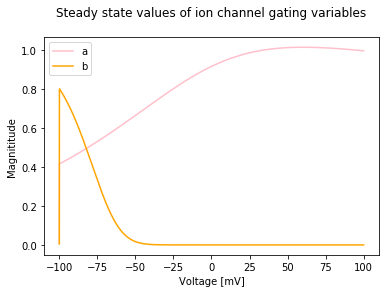

In [125]:
# plt.plot(V_steady_state, m, label='m', color = 'blue')
# plt.plot(V_steady_state, h, label='h', color = 'green')
# plt.plot(V_steady_state, n, label='n', color = 'red')
plt.plot(V_steady_state, a, label='a', color = 'pink')
plt.plot(V_steady_state, b, label='b', color = 'orange')

plt.title(r"Steady state values of ion channel gating variables""\n")
plt.xlabel(r'Voltage [mV]')
plt.ylabel(r'Magnititude')
plt.legend()
plt.show()

In [84]:
def hh_vt_2(I0, max_range, deltaT, m_0, h_0, n_0, a_0, b_0):
    V = np.zeros(max_range)
    m = np.zeros(max_range)
    h = np.zeros(max_range)
    n = np.zeros(max_range)
    a = np.zeros(max_range)
    b = np.zeros(max_range)
    t = []
    for i in range(max_range):
        mult =  float("%0.7f" % (i * deltaT))
        t.append(mult)
        
        if i == 0:
            V[i] = -73
            m[i] = m_0
            h[i] = h_0
            n[i] = n_0
            a[i] = a_0
            b[i] = b_0
        else:    
            V[i] = (ie_t(t[i-1], te, ts, I0)
             - gL * (V[i-1] - El) 
             - gNa * m[i-1]**(3) * h[i-1] * (V[i-1] - Ena)
             - gK * n[i-1]**(4) * (V[i-1] - Ek)
             - gA * a[i-1]**(3) * b[i-1] * (V[i-1] - Ea)) * (deltaT/Cm) + V[i-1]


            m[i] = (alpha_m_2(V[i-1]) * (1 - m[i-1]) - beta_m_2(V[i-1]) * m[i-1]) * deltaT + m[i-1]
            h[i] = (alpha_h_2(V[i-1]) * (1 - h[i-1]) - beta_h_2(V[i-1]) * h[i-1]) * deltaT + h[i-1]
            n[i] = (alpha_n_2(V[i-1]) * (1 - n[i-1]) - beta_n_2(V[i-1]) * n[i-1]) * deltaT + n[i-1]
            a[i] = (a_infiniti(V[i-1]) - a[i-1]) * (deltaT/a_tau(V[i-1])) + a[i-1] 
            b[i] = (b_infiniti(V[i-1]) - b[i-1]) * (deltaT/b_tau(V[i-1])) + b[i-1]
                    
            if math.isnan(m[i]):
                m[i] = 0
            if math.isnan(n[i]):
                n[i] = 0
            if math.isnan(h[i]):
                h[i] = 0
    return V, t

In [109]:
max_range = 20000
V = np.zeros([int(I0_steps + 1), max_range])
current_amp = []
threshold = -2000

for i in range(int(I0_steps + 1)):
    current_amp.append(I0_start + i * I0_delta)
    V[i], t = hh_vt_2((I0_start + i * I0_delta), max_range, deltaT, m_0, h_0, n_0, a_0, b_0)
    
    max_value = max(V[i][4000:16000])
    
    if threshold < max_value:
        threshold = max_value
print(threshold)

42.47486251916265


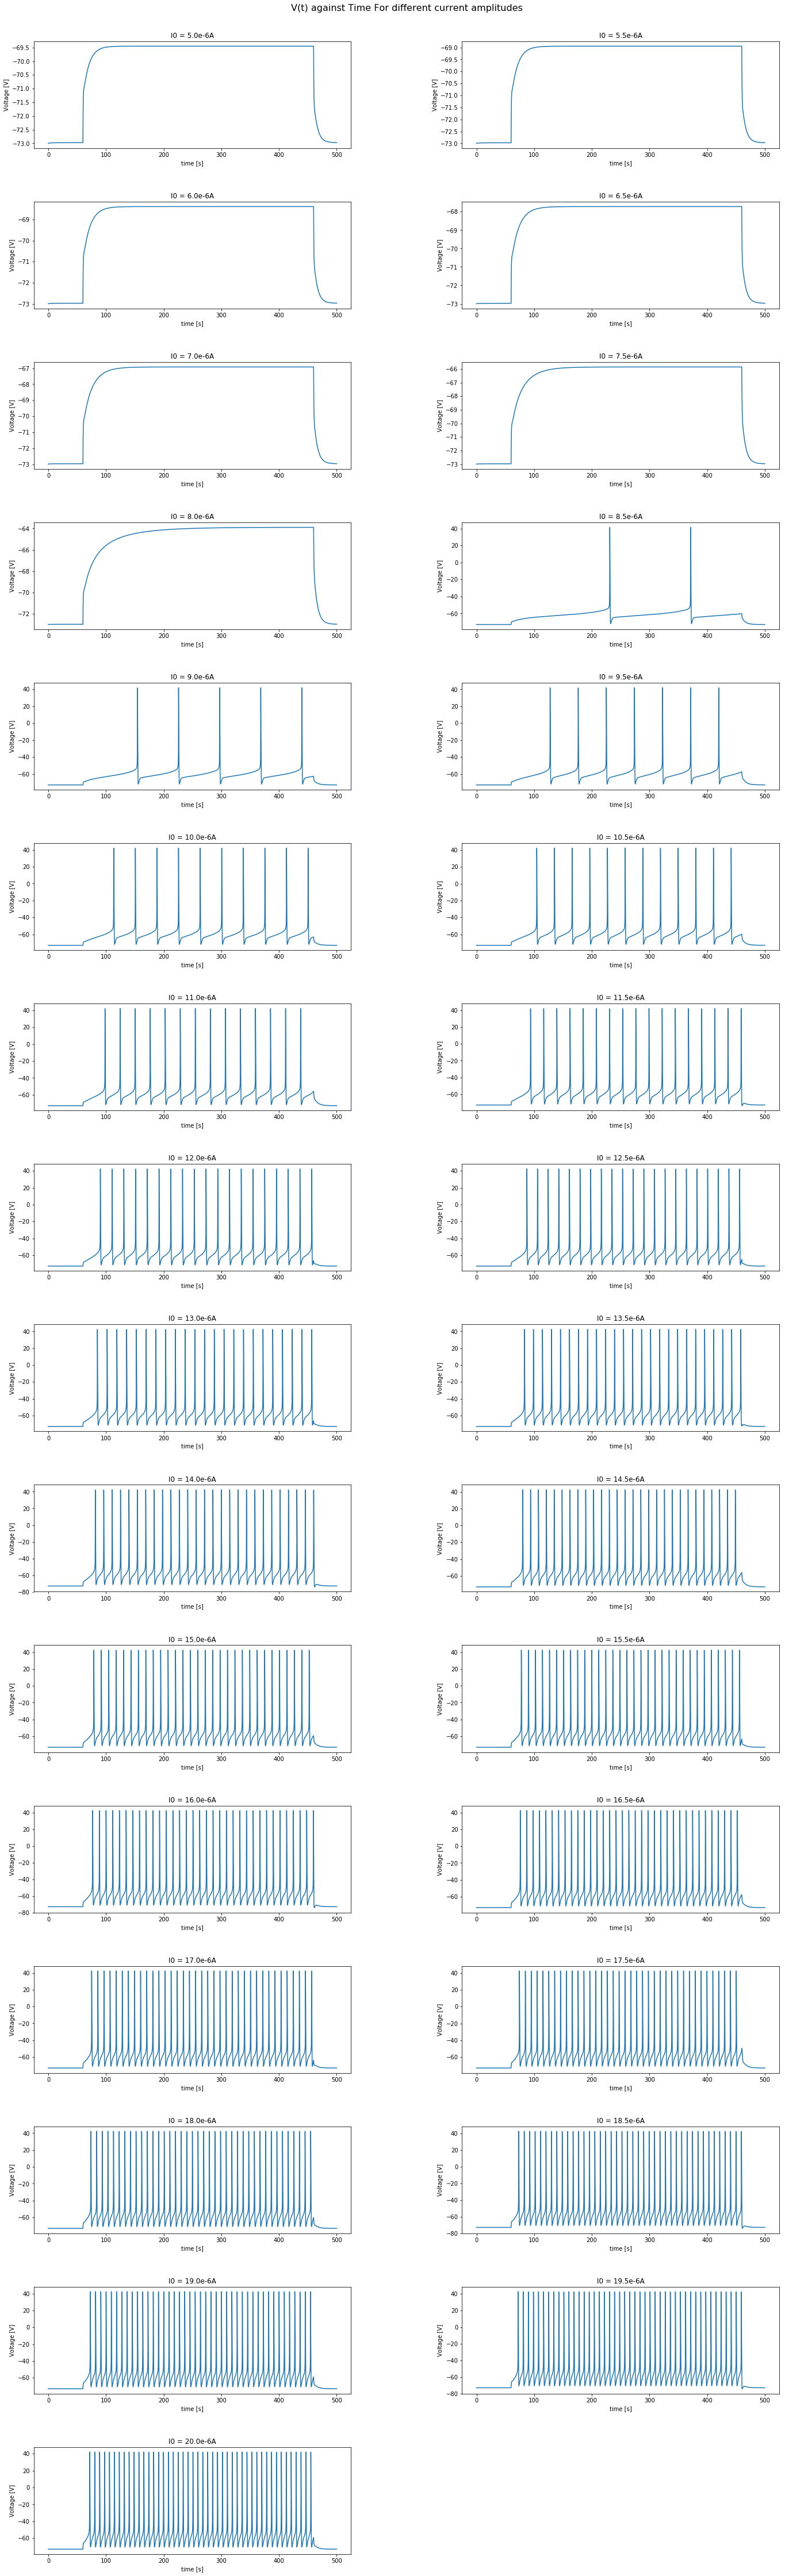

In [122]:
plt.figure(figsize=(20, 90))
plt.suptitle('V(t) against Time For different current amplitudes', fontsize=16)
for i in range(int(I0_steps + 1)):    
    plt.subplot(21,2,i+1)
    plt.plot(t, V[i])
    plt.title(r'I0 = {}e-6A'.format(I0_start + i * I0_delta))
    plt.xlabel(r'time [s]')
    plt.ylabel(r'Voltage [V]')    
plt.subplots_adjust(top=0.97, bottom=0.08, left=0.05, right=0.95, hspace=0.5, wspace=0.35)
plt.show()

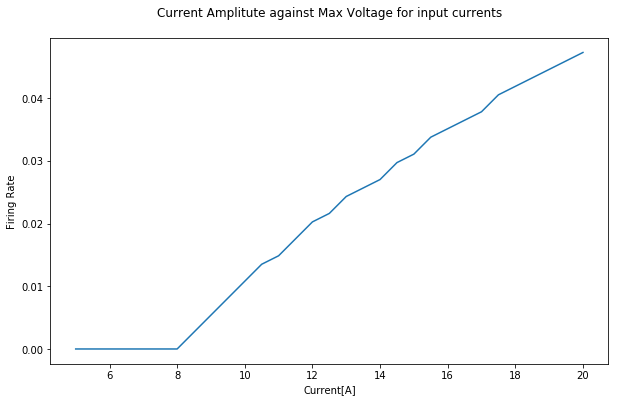

In [117]:


count_threshold_bypass = 0
firing_rate = []

for p in range(int(I0_steps + 1)):
    o = 4000
    while o < 16000:
        if V[p][o] > (threshold * (1/2)):
            bool_threshold = False
            for k in range(o, 20000):     
                if V[p][k] > (threshold * (2/3)) and bool_threshold == False:  
                    count_threshold_bypass = count_threshold_bypass + 1
                    bool_threshold = True      
                if V[p][k] < (threshold * (1/2)) or V[p][k] <= -50 or k == 20000 - 1:    
                    o = k
                    break
        o += 1        
    firing_rate.append(count_threshold_bypass/740)
    count_threshold_bypass = 0
plt.figure(figsize=(10, 6))
plt.plot(current_amp, firing_rate)

plt.title(r"Current Amplitute against Max Voltage for input currents""\n")
plt.xlabel(r'Current[A]')
plt.ylabel(r'Firing Rate')
plt.show()